In [43]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [44]:
def load_data(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    return data

film_files = [f for f in os.listdir('.') if f.endswith('.py') and 'FILM' in f]
c60_files = [f for f in os.listdir('.') if f.endswith('.py') and 'C60' in f]
print(film_files)
print(c60_files)


['iCCD_MAPI__150uW_FILM_iCCD.py', 'iCCD_MAPI__15uW_FILM_iCCD.py', 'iCCD_MAPI__1p5uW_FILM_iCCD.py']
['iCCD_MAPI__150uW_C60_iCCD.py', 'iCCD_MAPI__15uW_C60_iCCD.py', 'iCCD_MAPI__1p5uW_C60_iCCD.py']


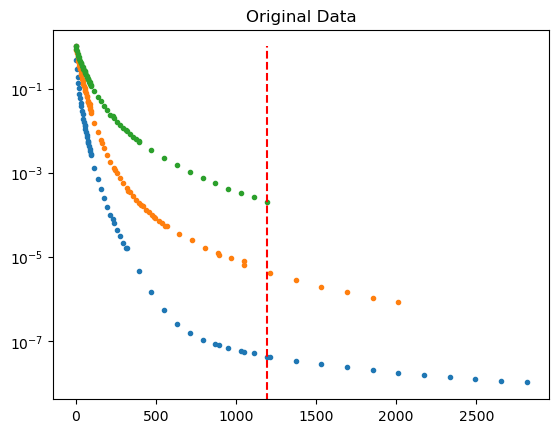

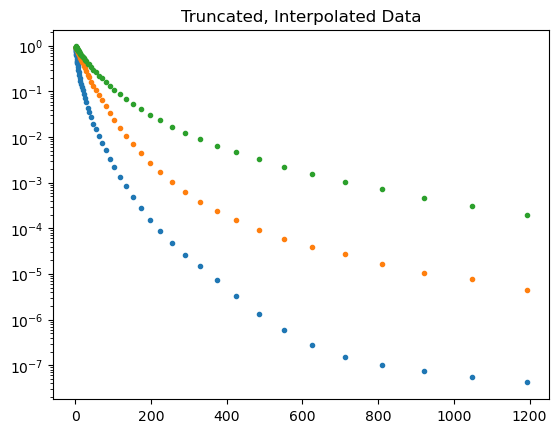

(4, 56)


In [45]:
film_data = []
film_times = []
film_signals = []

# Load data and extract time and signal for each file
for file_path in film_files:
    data = load_data(file_path)
    time = data[0] - data[0][0]  # Normalize time to start from 0
    signal = data[1]/data[1][0]  # Normalize signal to start from 1
    plt.plot(time, signal,'.')
    plt.yscale('log')
    plt.title('Original Data')
    film_data.append(data)
    film_times.append(time)
    film_signals.append(signal)

# Determine the minimum length of time axis
min_len_time = min(len(time) for time in film_times)
min_len_time_value = film_times[-1][min_len_time-1]

plt.vlines(min_len_time_value, 0, 1, colors='r', linestyles='dashed')
plt.show()

new_time = np.logspace(0, np.log10(min_len_time_value) , min_len_time)

# Truncate time and signal arrays to the minimum length as well as interpolating data to have the same time axis
new_film_signals = []
for ft, fs in zip(film_times,film_signals):
    interpolation_function = interp1d(ft, fs, fill_value='extrapolate')

    new_film_signals.append([interpolation_function(new_time)][0])

for s in new_film_signals:
    plt.plot(new_time, s,'.')
    plt.yscale('log')
    plt.title('Truncated, Interpolated Data')
plt.show()


# Stack time and signal arrays into a single numpy array
film_data_array = np.vstack([new_time] + new_film_signals)
print(film_data_array.shape)
#Save the data
np.save(f'film_data.npy', film_data_array)

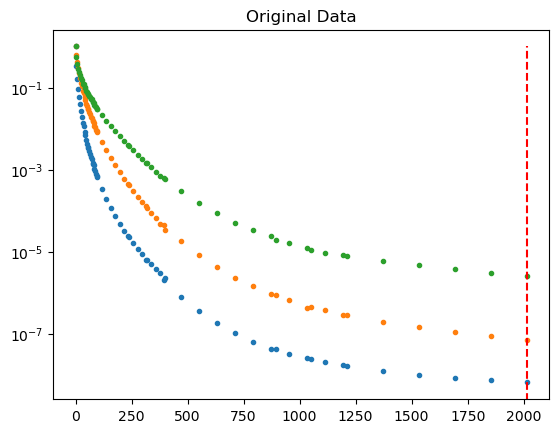

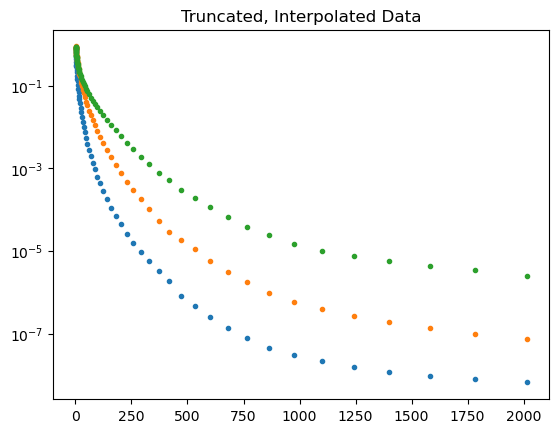

(4, 64)


In [46]:
c60_data = []
c60_times = []
c60_signals = []

# Load data and extract time and signal for each file
for file_path in c60_files:
    data = load_data(file_path)
    time = data[0] - data[0][0]  # Normalize time to start from 0
    signal = data[1] / data[1][0]  # Normalize signal to start from 1
    plt.plot(time, signal, '.')
    plt.yscale('log')
    plt.title('Original Data')
    c60_data.append(data)
    c60_times.append(time)
    c60_signals.append(signal)

# Determine the minimum length of time axis
min_len_time = min(len(time) for time in c60_times)
min_len_time_value = c60_times[-1][min_len_time - 1]

plt.vlines(min_len_time_value, 0, 1, colors='r', linestyles='dashed')
plt.show()

new_time = np.logspace(0, np.log10(min_len_time_value), min_len_time)

# Truncate time and signal arrays to the minimum length as well as interpolating data to have the same time axis
new_c60_signals = []
for ct, cs in zip(c60_times, c60_signals):
    interpolation_function = interp1d(ct, cs, fill_value='extrapolate')

    new_c60_signals.append([interpolation_function(new_time)][0])

for s in new_c60_signals:
    plt.plot(new_time, s, '.')
    plt.yscale('log')
    plt.title('Truncated, Interpolated Data')
plt.show()

# Stack time and signal arrays into a single numpy array
c60_data_array = np.vstack([new_time] + new_c60_signals)
print(c60_data_array.shape)
# Save the data
np.save(f'c60_data.npy', c60_data_array)